<a href="https://colab.research.google.com/github/yueqiu2/Machine_Learning_Code/blob/main/CO2_property_prediction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO$_2$ property prediction

In this coursework, you are given different experimental datasets of thermophysical fluid properties of CO$_2$, specifically vapour-liquid equilibrium data and PvT data for the supercritical region. The high-level objective is to be able to correlate the data in a way that one could interpolate the data in an analytical way, in a similar way that one might use an equation of state.

You will find <font color='blue'>text in blue for a few simple planned **coding tasks** that you can implement.</font> with their relevant marks in <font color='red'> red </font>.
Within the code cell, we suggest your implementation to be between the line:

`============= Start of your code =============`

and the line:

`============= End of your code =============`.

<font color='red'> Your answer here </font> are stand-ins for qualitative parts

The marking points are included in <font color='red'> red </font>. A typical marking breakdown of a problem worth 5 marks would involve for example 3 marks for the goodness of the fit, 1 mark for the visualisation, and 1 mark for a comment on the fit.

Let's start off by importing some packages. Feel free to import any additional packages you might consider useful.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy
from scipy.optimize import minimize, differential_evolution

# ============= Start of your code =============

from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from copy import deepcopy

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import preprocessing
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    validation_curve,
    StratifiedShuffleSplit,
    GridSearchCV)
# ============= End of your code =============

# Vapour pressure prediction based on temperature <font color='red'> (25 pts) </font>

First, let's load the datasets we will be considering.

In [ ]:
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
df_test = pd.read_excel(directory_1, sheet_name='Phase Envelope')
df = pd.read_excel(directory_2, sheet_name='Phase Envelope')

By printing off the first 10 rows of the pandas dataset, we can get a feeling for what the data will look like.

In [ ]:
df[:10]

,Temperature / K,Pressure / Pa,Liquid Density / (mol m^-3),Vapour Density / (mol m^-3)
0,200.83,234473.909,28466.551,143.517
1,203.44,275542.627,27046.017,171.653
2,211.69,373071.925,27340.958,237.315
3,217.11,477541.794,25899.121,278.248
4,216.17,514717.737,26022.943,312.383
5,219.16,590129.895,26598.016,340.323
6,231.52,786878.590,26189.589,472.885
7,231.71,874155.487,25721.547,516.340
8,241.24,1393145.478,24445.102,809.685
9,250.27,1663044.121,23711.731,977.451


The describe() function also gives high-level statistical information where we can explore any potential skewedness in the data.
Note that in this case some of the statistical information is meaningless, as we are not searching for a mean value, but rather for a trend.

In [ ]:
df.describe()

,Temperature / K,Pressure / Pa,Liquid Density / (mol m^-3),Vapour Density / (mol m^-3)
count,17.000000,1.700000e+01,17.000000,17.000000
mean,242.404706,1.965774e+06,23731.927294,1305.053706
std,29.318148,1.884307e+06,3586.732910,1455.493992
min,200.830000,2.344739e+05,15898.131000,143.517000
25%,217.110000,5.147177e+05,22331.663000,312.383000
50%,241.240000,1.393145e+06,24445.102000,809.685000
75%,261.620000,2.467374e+06,26189.589000,1416.887000
max,294.570000,6.166110e+06,28466.551000,5229.166000


In [ ]:
df_array = df.values
df_test_array = df_test.values

We convert the pandas dataset to a numpy array, and extract equilibrium temperature from the first column as the independent and pressure from the second column as the dependent variables.

In [ ]:
x = df_array[:,0]
y = df_array[:,1]
x_test = df_test_array[:,0]
y_test = df_test_array[:,1]

Text(0, 0.5, 'Pressure in Pa')

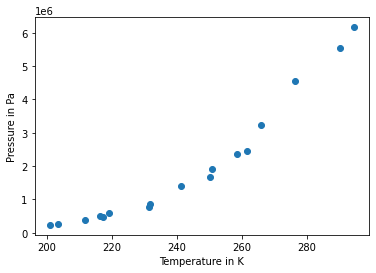

In [ ]:
plt.scatter(x, y)
plt.xlabel('Temperature in K')
plt.ylabel('Pressure in Pa')

<font color='blue'> As a first step, fit a simple linear regression (without standardisation) on the training data. Visualize and comment on the fit. Report (print) the training and testing score(s). For this task, you can either use scikit-learn, or you can implement the formula we saw in class. </font>  <font color='red'> (5 pts.) </font>

R squared value on training set: 0.904
R squared value on test set: 0.916


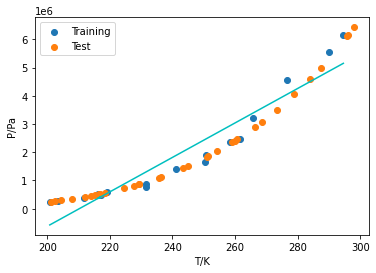

In [ ]:
# ============= Start of your code =============
# reshape training data to 2D
x = np.array(x).reshape(len(x), 1)
y = np.array(y).reshape(len(y), 1)

# reshape test data to 2D
x_test = x_test.reshape(len(x_test), -1)
y_test = y_test.reshape(len(y_test), -1)

# linear regression: model training
T_P_model = LinearRegression()
T_P_model.fit(x, y)

# linear regression: evaluation
train_score = T_P_model.score(x, y)
test_score = T_P_model.score(x_test, y_test)
print(f"R squared value on training set: {train_score:.3f}")
print(f"R squared value on test set: {test_score:.3f}")

# linear regression: predict
T_P_predict = T_P_model.predict(x)
# plot: predict
plt.plot(x, T_P_predict, c='c')  # c = color
# plot: training & test set
plt.scatter(x.squeeze(), y.squeeze(), label='Training')
plt.scatter(x_test.squeeze(), y_test.squeeze(), label='Test')

plt.xlabel('T/K', fontsize=10)
plt.ylabel('P/Pa', fontsize=10)
plt.legend()
plt.show()
# ============= End of your code =============

<font color='red'> Your answer here </font>

* Although we have a relatively reasonable correlation coefficient R2, the shape of our model is linear while the image of actual dataset is a curve. Thus, the model cannot provide a decent fit of the data.

Note how, in spite of having some reasonable correlation coefficient R$^2$, we can see by "eye" that we are not doing a great job fitting the data.

<font color='blue'> Now, repeat this task including visualization and score reporting, but where the data is standardised before fitting. Does this improve the fit? </font> <font color='red'> (5 pts) </font>

(2 pts for standardizing, 3 pts for rest of task)


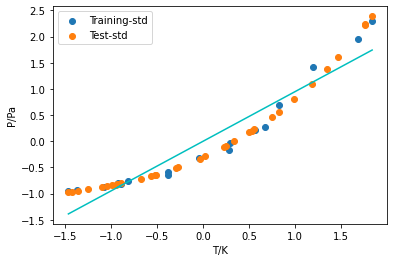

R squared value on std training set(standard): 0.904
R squared value on std test set(standard): 0.917


In [ ]:
# ============= Start of your code =============
# standardization
x_std = preprocessing.scale(x)
y_std = preprocessing.scale(y)
x_std_test = preprocessing.scale(x_test)
y_std_test = preprocessing.scale(y_test)

# linear regression: training (standardization)
T_P_model_std = LinearRegression()
T_P_model_std.fit(x_std, y_std)

# plot: predict (std)
T_P_predict_std = T_P_model_std.predict(x_std)
plt.plot(x_std, T_P_predict_std, c='c')  # c = color

# plot: training set & test set (std)
plt.scatter(x_std.squeeze(), y_std.squeeze(), label='Training-std')
plt.scatter(x_std_test.squeeze(), y_std_test.squeeze(), label='Test-std')

plt.xlabel('T/K', fontsize=10)
plt.ylabel('P/Pa', fontsize=10)
plt.legend()
plt.show()

# linear regression: evaluation (std)
score_LR_TP_train_std = T_P_model_std.score(x_std, y_std)           # training set
score_LR_TP_test_std = T_P_model_std.score(x_std_test, y_std_test)  # test set
print(f"R squared value on std training set(standard): {score_LR_TP_train_std:.3f}")
print(f"R squared value on std test set(standard): {score_LR_TP_test_std:.3f}")
# ============= End of your code =============

<font color='red'> Your answer here </font>

* There is no visible changes in R squared value after standardization, which indicates standardization does not improve the fit.

Preprocessing (standardising, ...) is usually a crucial step in data science and Machine Learning pipelines. <font color='blue'>
 Why does preprocessing seemingly have no effect on linear regression? How does this change with the addition of regularization terms (lasso, ridge regression)? </font> The answer to this could be quantitative or qualitative <font color='red'> (5 pts) </font>

In [ ]:
# ============= Start of your code =============

'''standardization'''
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
y_std = scaler.fit_transform(y)
x_test_std = scaler.fit_transform(x_test)
y_test_std = scaler.fit_transform(y_test)

'''lasso'''
# lasso regression model
lasso = Lasso(alpha=0.1)

# fit data without standardization
lasso.fit(x, y)
# get score without standardization
lasso_training_score = lasso.score(x, y)
lasso_test_score = lasso.score(x_test, y_test)

# fit data with standardization
lasso.fit(x_std, y_std)
# get score with standardization
lasso_training_score_std = lasso.score(x_std, y_std)
lasso_test_score_std = lasso.score(x_test_std, y_test_std)

'''ridge'''
# ridge regression model
ridge = Ridge(alpha=1)

# fit data without standardization
ridge.fit(x, y)
# get score without standardization
ridge_training_score = ridge.score(x, y)
ridge_test_score = ridge.score(x_test, y_test)

# fit data with standardization
ridge.fit(x_std, y_std)
# get score without standardization
ridge_training_score_std = ridge.score(x_std, y_std)
ridge_test_score_std = ridge.score(x_test_std, y_test_std)

'''print score'''
print(f"lasso_training_score: {lasso_training_score:.3f}")
print(f"lasso_test_score: {lasso_test_score:.3f}"'\n')

print(f"lasso_training_score_std: {lasso_training_score_std:.3f}")
print(f"lasso_test_score_std: {lasso_test_score_std:.3f}"'\n')

print(f"ridge_training_score: {ridge_training_score:.3f}")
print(f"ridge_test_score: {ridge_test_score:.3f}"'\n')

print(f"ridge_training_score_std: {ridge_training_score_std:.3f}")
print(f"ridge_test_score_std: {ridge_test_score_std:.3f}")
# ============= End of your code =============

lasso_training_score: 0.904
lasso_test_score: 0.916

lasso_training_score_std: 0.894
lasso_test_score_std: 0.905

ridge_training_score: 0.904
ridge_test_score: 0.916

ridge_training_score_std: 0.901
ridge_test_score_std: 0.913


<font color='red'> Your answer here </font>

* Standardization is a form of linear transformation, which is a process of putting different variables on the same scale and near the origin.
* Since linear relation of the data before or after linear transformation remains the same, R2 squared value remains the same even slope and intercept of the model change. Therefore, standardization has no effect on linear regression.

* As shown above, R squared scores of Lasso and Ridge regression both decreased after standardization.
* Penalty functions of both Lasso and Ridge are associated with the norms of coefficients. After scaling, changes of data lead to changes of coefficients, causing changes of norms, penalty functions, and objective functions in lasso/ridge regression.
* Variations of norms are not linear to data changes caused by standardization, which means the consistency of linear relation of lasso/ridge objective functions before and after scaling will not be maintained. Thus, R squared scores will change.



<font color='blue'>
Using the full data set df_full, split the data into a training and test set, and fit a neural network to map the pressure as a function of temperature. You may use any of the following libraries: numpy, scipy, pandas, scikit-learn, pytorch. Remember that you can change some hyperparameters to improve the fit (hint: use an initial learning rate of 1). </font> <font color='red'> (5 pts) </font>

Also, remember that you are highly encouraged to set random seeds/states in your models for results to be reproducible.

In [ ]:
directory = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Full-Dataset%20(no%20noise).xlsx"
df_full = pd.read_excel(directory, sheet_name='Phase Envelope')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'fit_time': array([0.039505  , 0.04822946, 0.03768945, 0.22965384, 0.76256371]), 'score_time': array([0.00089979, 0.0008707 , 0.00085497, 0.00089169, 0.0010066 ]), 'test_score': array([  0.11198227, -19.59570063,  -0.70338336,   0.99548203,
         0.3623151 ]), 'train_score': array([0.92327275, 0.91791121, 0.91126924, 0.99714352, 0.99981874])}


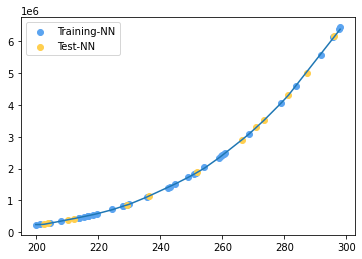

R2 score on training set: 1.000
R2 score on test set: 1.000


In [ ]:
# ============= Start of your code =============
# cross validation: 5-fold
cv_N = 5

# obtain data values
df_array = df_full.values
X = df_array[:, 0]  # Temperature
y = df_array[:, 1]  # Pressure
# reshape data to 2D
X = np.array(X).reshape(len(X), 1)
y = np.array(y)

# spilt data: training set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# neural network
TP_nn1 = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(100,100),
        random_state=10,
        learning_rate='constant',
        learning_rate_init=1,
        batch_size=32)
)
# neural network: training
TP_nn1.fit(X, y)

# neural network: cross validation
score_nn1 = cross_validate(TP_nn1, X, y, cv=cv_N, return_train_score=True)
print(score_nn1)

# neural network: predict
TP_nn1_predict = TP_nn1.predict(X)               # full data
TP_nn1_predict_train = TP_nn1.predict(X_train)   # training set
TP_nn1_predict_test = TP_nn1.predict(X_test)     # test set
# plot: predict
plt.plot(X, TP_nn1_predict)
# plot: training set & test set
plt.scatter(X_train, y_train, label='Training-NN', c='#5ba4f0')  # training set
plt.scatter(X_test, y_test, label='Test-NN', c='#ffcf4f')        # test set

plt.legend()
plt.show()

# R2 score: training set & test set
train_score = r2_score(y_train, TP_nn1_predict_train)  # training set
test_score = r2_score(y_test, TP_nn1_predict_test)     # test set
print(f'R2 score on training set: {train_score:.3f}')
print(f"R2 score on test set: {test_score:.3f}")
# ============= End of your code =============

You search through your thermodynamics classnotes, and stumble upon the Clausius-Clapeyron relation:

$$ln(\frac{P_2}{P_1}) = -\frac{\Delta H_R}{R} (\frac{1}{T_2} - \frac{1}{T_1})$$

Using the temperature and pressure from the df and df_test datasets, construct new independent and dependent features that can be easily related using linear regression. How does the neural network fit compare to the thermodynamics-informed linear regression? <font color='red'> (5 pts) </font>


In [ ]:
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
df_test = pd.read_excel(directory_1, sheet_name='Phase Envelope')
df = pd.read_excel(directory_2, sheet_name='Phase Envelope')

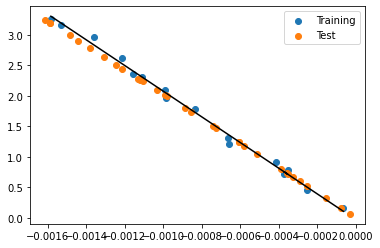

R squared value on training set: 0.994
R squared value on test set: 0.996


In [ ]:
# ============= Start of your code =============

df_array = df.values
df_test_array = df_test.values

'''original training data: temperature (column 0), pressure (column 1)'''
T1 = df_array[0,0].reshape(-1,1) # fix T1 as the temperature of the first sample
T2 = df_array[1:,0].reshape(-1,1) # set T2 as the temperature of the second to the last sample
P1 = df_array[0,1].reshape(-1,1) # fix P1 as the pressure of the first sample
P2 = df_array[1:,1].reshape(-1,1) # set P2 as the pressure of the second to the last sample

'''original test data: temperature (column 0), pressure (column 1)'''
T1_test = df_test_array[0,0].reshape(-1,1)
T2_test = df_test_array[1:,0].reshape(-1,1)
P1_test = df_test_array[0,1].reshape(-1,1)
P2_test = df_test_array[1:,1].reshape(-1,1)

'''transform to thermodynamic formula: set (1/T2 - 1/T1) as x, ln(p2/P1) as y '''
# new training dataset
x = (1/T2) - (1/T1)
y = np.log(P2/P1)
# new test dataset
x_test = (1/T2_test) - (1/T1_test)
y_test = np.log(P2_test/P1_test)

'''model and score'''
# model
lr = LinearRegression()
lr.fit(x, y)
# score
training_score = lr.score(x,y)
test_score = lr.score(x_test, y_test)

'''visualization'''
# predict
predicted = lr.predict(x)
# plot
plt.plot(x, predicted, c='k')
plt.scatter(x, y, label='Training')
plt.scatter(x_test, y_test, label='Test')
plt.legend(loc="best")
plt.show()

print(f"R squared value on training set: {training_score:.3f}")
print(f"R squared value on test set: {test_score:.3f}")
# ============= End of your code =============

<font color='red'> Your answer here </font>

* Both neural networks and linear regression model based on Clausius-Clapeyron relation are performed well in this case. However, performance of neural network cannot be guaranteed beyond the range of dataset.


# 2 Density prediction based on temperature and pressure <font color='red'> (25 pts) </font>

Let's start by loading in the new dataset.

In [ ]:
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
df_test = pd.read_excel(directory_1, sheet_name='PVT')
df = pd.read_excel(directory_2, sheet_name='PVT')

<font color='blue'>
Repeat the previous data exploration. Compare the dataset used to the one in the linear regression. <font color='red'> (5 pts.) </font>
Then fit a neural network to predict the density based on temperature and pressure.
</font> <font color='red'> (5 pts.) </font>

Optional: Explore different kinds of models and see if they give a better fit

In [ ]:
# ============= Start of your code =============
df[:10]
df.describe()
# ============= End of your code =============

,Temperature / K,Density / (mol m^-3),Pressure / Pa
count,1982.000000,1982.000000,1.982000e+03
mean,505.227497,15108.831471,1.711570e+08
std,138.070129,8644.898805,2.300264e+08
min,202.130000,137.147000,4.021716e+05
25%,386.712500,7658.063250,2.114711e+07
50%,504.100000,15293.338500,7.183241e+07
75%,624.915000,22749.927000,2.222867e+08
max,744.870000,29398.853000,1.349381e+09


<font color='red'> Your answer here </font>

* Dataset here is much larger than the previous one.
* Ranges of physical properties of the dataset indicated by maximum and minimum of values is much larger than the previous one.
* Standard deviation of the data set is larger than the previous dataset.


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

training score:0.945
test score:0.944


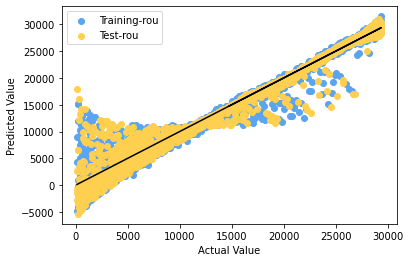

In [ ]:
# ============= Start of your code =============
# obtain dataset
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
# training set
df = pd.read_excel(directory_2, sheet_name='PVT')
# test set
df_test = pd.read_excel(directory_1, sheet_name='PVT')

df_array = df.values
df_test_array = df_test.values

# data X: Temperature (column 0) and Pressure (column 2)
X = df_array[:, [0, 2]]                            # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = df_test_array[:, [0, 2]]                  # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape
# data y: Density (column 1)
rou = df_array[:, 1]                                     # training set
rou = np.array(rou).reshape(len(rou), 1)                 # training set reshape
rou_test = df_test_array[:, 1]                           # test set
rou_test = np.array(rou_test).reshape(len(rou_test), 1)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))        # X: Temperature & Pressure
rou_all = np.vstack((rou, rou_test))  # y: Density


# cross validation: 5-fold
cv_N = 5

# neural network
pipe_rou = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                 hidden_layer_sizes=(50,),
                 early_stopping=True,
                 max_iter=500,
                 learning_rate='constant',
                 learning_rate_init=10,
                 batch_size=30,
                 alpha=0.05,
                 )
)
# neural network: training
pipe_rou.fit(X, rou)

# neural network: cross validation
scores_rou = cross_validate(pipe_rou, X_all, rou_all, cv=cv_N, return_train_score=True)
train_score_mean1_rou = np.mean(scores_rou['train_score'])  # average train_score
test_score_mean1_rou = np.mean(scores_rou['test_score'])    # average test_score
print(f'training score:{train_score_mean1_rou:.3f}')
print(f'test score:{test_score_mean1_rou:.3f}')

# predict: training set & test set
pipe_rou_predict_train = pipe_rou.predict(X)      # training set
pipe_rou_predict_test = pipe_rou.predict(X_test)  # test set

# plot: actual values = predicted values (for contrast)
plt.plot(rou.squeeze(), rou.squeeze(), c='k')
# plot: actual values vs. values predicted by training set input
plt.scatter(rou.squeeze(), pipe_rou_predict_train.squeeze(), label='Training-rou', c='#5ba4f0')
# plot: actual values vs. values predicted by test input
plt.scatter(rou_test.squeeze(), pipe_rou_predict_test.squeeze(), label='Test-rou', c='#ffcf4f')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()
# ============= End of your code =============

<font color='blue'> Comment on the fit. Does this make thermodynamic sense?
</font> <font color='red'> (3 pts) </font>




<font color='red'> Your answer here </font>

* The temperature of the dataset ranges from 200K to 700 K. Within the range from 300K to 700K, it is the gas phase. Within the range from 200K to 300K, there is a gas-liquid coexistence, where the molar density is higher than that of the gas phase. Therefore, if we predict these two different states of the system using a single model, it will have a large error.
* We can only find how density varies with the variation of temperature and pressure but cannot have a precise prediction on the density of both liquid and vapor simultaneously. Therefore, the thermodynamic sense of the model is limited.




<font color='blue'> Now, try and fit pressure as a function of temperature and density. Comment on the fit.
</font> <font color='red'> (5 pts) </font>

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

training score:0.990
test score:0.990


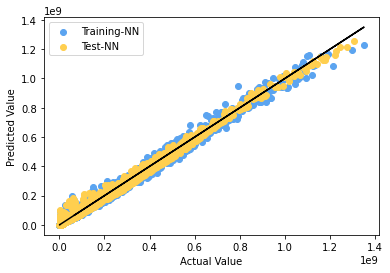

In [ ]:
# ============= Start of your code =============
# obtain dataset
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
# training set
df = pd.read_excel(directory_2, sheet_name='PVT')
# test set
df_test = pd.read_excel(directory_1, sheet_name='PVT')

# data X: Temperature (column 0) and Density (column 1)
X = df_array[:, 0:2]                               # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = df_test_array[:, 0:2]                     # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape
# data y: Pressure (column 2)
p_0 = df_array[:, 2]                                   # training set
p = np.array(p_0).reshape(len(p_0), 1)                 # training set reshape
p_test_0 = df_test_array[:, 2]                         # test set
p_test = np.array(p_test_0).reshape(len(p_test_0), 1)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))  # X: Temperature & Density
p_all = np.vstack((p, p_test))  # y: Pressure


# cross validation: 5-fold
cv_N = 5

# neural network
pipe_P = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                 hidden_layer_sizes=(50,),
                 early_stopping=True,
                 max_iter=500,
                 learning_rate='constant',
                 learning_rate_init=10,
                 batch_size=30,
                 alpha=0.01,
                 )
)
# neural network: training
pipe_P.fit(X, p)

# neural network: cross validation
scores_P = cross_validate(pipe_P, X_all, p_all, cv=cv_N, return_train_score=True)
train_score_mean1_p = np.mean(scores_P['train_score'])  # average train_score
test_score_mean1_p = np.mean(scores_P['test_score'])    # average test_score
print(f'training score:{train_score_mean1_p:.3f}')
print(f'test score:{test_score_mean1_p:.3f}')

# predict: training set & test set
pipe_P_predict_train = pipe_P.predict(X)      # training set
pipe_P_predict_test = pipe_P.predict(X_test)  # test set
# plot: actual values = predicted values (for contrast)
plt.plot(p.squeeze(), p.squeeze(), c='k')
# plot: actual values vs. values predicted by training set input
plt.scatter(p.squeeze(), pipe_P_predict_train, label='Training-NN', c='#5ba4f0')
# plot: actual values vs. values predicted by test input
plt.scatter(p_test.squeeze(), pipe_P_predict_test.squeeze(), label='Test-NN', c='#ffcf4f')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()
# ============= End of your code =============

<font color='red'> Your answer here </font>

* Performance is better than the previous one in this case.



<font color='blue'> Your friend suggests fitting the compressibility ($Z = \frac{P}{\rho R T}$) instead of the pressure. Does this give a better fit? Why?
</font> <font color='red'> (7 pts) </font>


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

training score:0.993
test score:0.993


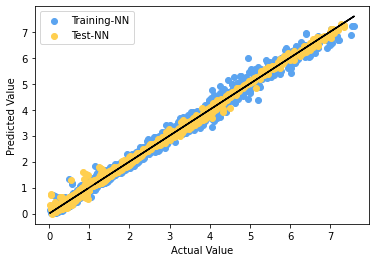

In [ ]:

# ============= Start of your code =============
# obtain dataset
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
# training set
df = pd.read_excel(directory_2, sheet_name='PVT')
# test set
df_test = pd.read_excel(directory_1, sheet_name='PVT')

df_array = df.values
df_test_array = df_test.values

# data: obtain Temperature, Density, Pressure of for calculation
# training set
t = df_array[:, 0]    # Temperature
den = df_array[:, 1]  # Density
p = df_array[:, 2]    # Pressure
# training set reshape
t = np.array(t)
den = np.array(den)
p = np.array(p)
# test set
t_test = df_test_array[:, 0]    # Temperature
den_test = df_test_array[:, 1]  # Density
p_test = df_test_array[:, 2]    # Pressure
# test set reshape
t_test = np.array(t_test)
den_test = np.array(den_test)
p_test = np.array(p_test)

# data: calculate Z = P/(R*T*rou)
z = np.true_divide(p, 8.31 * np.multiply(den, t))                      # training set
z = np.array(z).reshape(len(z), 1)                                     # training set reshape
z_test = np.true_divide(p_test, 8.31 * np.multiply(den_test, t_test))  # test set
z_test = np.array(z_test).reshape(len(z_test), 1)                      # test set reshape

# data X: Temperature (column 0) and Density (column 1)
# obtain values
X = df.iloc[:, 0:2].values                         # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = df_test.iloc[:, 0:2].values               # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))  # X: Temperature & Density
z_all = np.vstack((z, z_test))  # Z


# cross validation: 10-fold
cv_N = 10

# neural network
pipe_z = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                 hidden_layer_sizes=(5, 5),
                 early_stopping=True,
                 learning_rate='constant',
                 learning_rate_init=0.005,
                 batch_size=32,
                 alpha=0.005,
                 )
)
# neural network: training
pipe_z.fit(X, z)

# neural network: cross validation
scores_z = cross_validate(pipe_z, X_all, z_all, cv=cv_N, return_train_score=True)
train_score_mean1 = np.mean(scores_z['train_score'])  # average train_score
test_score_mean1 = np.mean(scores_z['test_score'])    # average test_score
print(f'training score:{train_score_mean1:.3f}')
print(f'test score:{test_score_mean1:.3f}')

# predict: training set & test set
pipe_z_predict_train = pipe_z.predict(X)      # training set
pipe_z_predict_test = pipe_z.predict(X_test)  # test set

# plot: actual values = predicted values (for contrast)
plt.plot(z.squeeze(), z.squeeze(), c='k')
# plot: actual values vs. values predicted by training set input
plt.scatter(z.squeeze(), pipe_z_predict_train, label='Training-NN', c='#5ba4f0')
# plot: actual values vs. values predicted by test input
plt.scatter(z_test.squeeze(), pipe_z_predict_test.squeeze(), label='Test-NN', c='#ffcf4f')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()

# ============= End of your code =============

<font color='red'> Your answer here </font>

* Fitting the compressibility gives a better performance.
* Compared to the previous model where the function of temperature, density and pressure is unknown, the function of temperature, density and compressibility is clear. It is easier to study this clear relationship than aimlessly looking for an uncertain relationship.

# Vapour and liquid density prediction based on temperature and pressure <font color='red'> (15 pts) </font>

In [ ]:
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
df_test = pd.read_excel(directory_1, sheet_name='Phase Envelope')
df = pd.read_excel(directory_2, sheet_name='Phase Envelope')
print(df.describe())
df_array = df.values
df_test_array = df_test.values

       Temperature / K  Pressure / Pa  Liquid Density / (mol m^-3)  \
count        17.000000   1.700000e+01                    17.000000   
mean        242.404706   1.965774e+06                 23731.927294   
std          29.318148   1.884307e+06                  3586.732910   
min         200.830000   2.344739e+05                 15898.131000   
25%         217.110000   5.147177e+05                 22331.663000   
50%         241.240000   1.393145e+06                 24445.102000   
75%         261.620000   2.467374e+06                 26189.589000   
max         294.570000   6.166110e+06                 28466.551000   

       Vapour Density / (mol m^-3)  
count                    17.000000  
mean                   1305.053706  
std                    1455.493992  
min                     143.517000  
25%                     312.383000  
50%                     809.685000  
75%                    1416.887000  
max                    5229.166000  


Since your current dataset is much smaller than the one used for the previous task, your friend suggests transfer learning: This means that you would use the model trained on the thousands of P,V to $\rho$ data from the previous step, create two copies thereof and continue training them to the current data set of 17 samples to predict the liquid and vapour densities. Is this a good idea?

<font color='blue'> Extract the relevant training and test data from the dataset, df and df_test.
 First, create a deepcopy of the previous model and check if the previous model gives a decent fit to predict liquid and vapour equilibrium densities.
Comment on the fit and discuss potential reasons. </font> <font color='red'> (8 pts) </font>

R2 score for liquid density:-5.987
R2 score for vapour density:-95.735


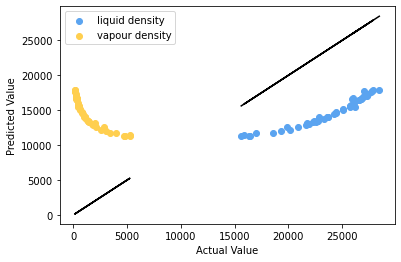

In [ ]:
# ============= Start of your code =============

# cross validation: 5-fold
cv_N = 5
# deepcopy: obtain old model for density prediction (pipe_rou)
old_model = deepcopy(pipe_rou)

# data X: Temperature (column 0) and Pressure (column 1)
X = df.iloc[:, 0:2].values                         # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = df_test.iloc[:, 0:2].values               # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape

# data y1: Liquid Density (column 2)
rou_l = df.iloc[:, 2].values                                   # training set
rou_l = np.array(rou_l).reshape(len(rou_l), 1)                 # training set reshape
rou_l_test = df_test.iloc[:, 2].values                         # test set
rou_l_test = np.array(rou_l_test).reshape(len(rou_l_test), 1)  # test set reshape

# data y2: Vapour Density (column 3)
rou_v = df.iloc[:, 3].values                                   # training set
rou_v = np.array(rou_v).reshape(len(rou_v), 1)                 # training set reshape
rou_v_test = df_test.iloc[:, 3].values                         # test set
rou_v_test = np.array(rou_v_test).reshape(len(rou_v_test), 1)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))              # X: Temperature & Pressure
rou_l_all = np.vstack((rou_l, rou_l_test))  # y1: Liquid Density
rou_v_all = np.vstack((rou_v, rou_v_test))  # y2: Vapour Density

# predict: training set & test set
pipe_rou_predict = old_model.predict(X_all)

# evaluate 1: real liquid density (all) vs. predicted values
liquid_density_r2 = r2_score(rou_l_all, pipe_rou_predict)
# evaluate 2: real vapour density (all) vs. predicted values
vapour_density_r2 = r2_score(rou_v_all, pipe_rou_predict)
print(f'R2 score for liquid density:{liquid_density_r2:.3f}')
print(f'R2 score for vapour density:{vapour_density_r2:.3f}')

# plot: actual values = predicted values (for contrast)
plt.plot(rou_l_all.squeeze(), rou_l_all.squeeze().squeeze(), c='k')  # liquid density
plt.plot(rou_v_all.squeeze(), rou_v_all.squeeze().squeeze(), c='k')  # vapour density
# plot: actual values vs. predicted values
plt.scatter(rou_l_all.squeeze(), pipe_rou_predict.squeeze(), label='liquid density', c='#5ba4f0')
plt.scatter(rou_v_all.squeeze(), pipe_rou_predict.squeeze(), label='vapour density', c='#ffcf4f')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()
# ============= End of your code =============

</font> <font color='red'> Your answer here </font>

* The previous model fails to perform a good fit to predict liquid and vapor equilibrium density.
* Under critical temperature (304.21K), the system contains two phases when it reaches equilibrium state. The previous dataset might not take it into consideration.
* Density in the figure might be calculated by total mass divided by total volume, values of liquid and vapor density were not calculated separately, which leads to failure to predict liquid and vapor density separately.

<font color='blue'>  Now, fit separate models to predict the equilibrium liquid and vapour densities. Comment on the fit </font> <font color='red'> (5 pts) </font>

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

training score for liquid density:0.968
test score for liquid density:0.830


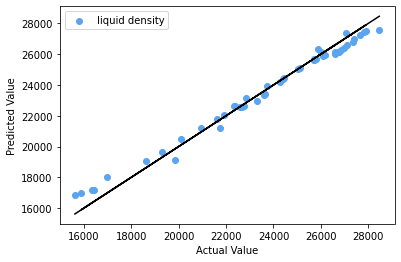

R squared value on liq total dataset:0.981
R squared value on liq training set:0.975
R squared value on liq test set:0.985


In [ ]:
# ============= Start of your code =============
# array
df_array = df.values
df_test_array = df_test.values

# data X: Temperature (column 0) and Pressure (column 1)
X = df.iloc[:, 0:2].values                         # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = df_test.iloc[:, 0:2].values               # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape

# data y1: Liquid Density (column 2)
rou_l = df.iloc[:, 2].values                                   # training set
rou_l = np.array(rou_l).reshape(len(rou_l), 1)                 # training set reshape
rou_l_test = df_test.iloc[:, 2].values                         # test set
rou_l_test = np.array(rou_l_test).reshape(len(rou_l_test), 1)  # test set reshape

# data y2: Vapour Density (column 3)
rou_v = df.iloc[:, 3].values                                   # training set
rou_v = np.array(rou_v).reshape(len(rou_v), 1)                 # training set reshape
rou_v_test = df_test.iloc[:, 3].values                         # test set
rou_v_test = np.array(rou_v_test).reshape(len(rou_v_test), 1)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))              # X: Temperature & Pressure
rou_l_all = np.vstack((rou_l, rou_l_test))  # y1: Liquid Density
rou_v_all = np.vstack((rou_v, rou_v_test))  # y2: Vapour Density

# cross validation: 5-fold
cv_N = 5

# neural network：liquid density
pipe_rou_l = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                     hidden_layer_sizes=(24,),
                     early_stopping=True,
                     learning_rate='constant',
                     learning_rate_init=9.9,
                     batch_size=10,
                     alpha=0.05,
                     )
)
# neural network: training (liq)
pipe_rou_l.fit(X, rou_l)

# neural network: cross validation (liq)
scores_l = cross_validate(pipe_rou_l, X_all, rou_l_all, cv=cv_N, return_train_score=True)
train_score_mean_l = np.mean(scores_l['train_score'])  # average train_score
test_score_mean_l = np.mean(scores_l['test_score'])    # average test_score
print(f'training score for liquid density:{train_score_mean_l:.3f}')
print(f'test score for liquid density:{test_score_mean_l:.3f}')

# predict: training set & test set (liq)
rou_l_perdicted = pipe_rou_l.predict(X_all)        # all
rou_l_perdicted_train = pipe_rou_l.predict(X)      # training set
rou_l_perdicted_test = pipe_rou_l.predict(X_test)  # test set

# plot: actual values = predicted values (for contrast) (liq)
plt.plot(rou_l_all.squeeze(), rou_l_all.squeeze().squeeze(), c='k')
# plot: actual values vs. predicted values (liq)
plt.scatter(rou_l_all.squeeze(), rou_l_perdicted, label='liquid density', c='#5ba4f0')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()

# r2 score: liquid density prediction
r2_l = r2_score(rou_l_all, rou_l_perdicted)             # all data
r2_l_train = r2_score(rou_l, rou_l_perdicted_train)     # training set
r2_l_test = r2_score(rou_l_test, rou_l_perdicted_test)  # test set
print(f'R squared value on liq total dataset:{r2_l:.3f}')
print(f'R squared value on liq training set:{r2_l_train:.3f}')
print(f'R squared value on liq test set:{r2_l_test:.3f}')

# ============= End of your code =============

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

training score for vapour density:0.935
test score for vapour density:0.560


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


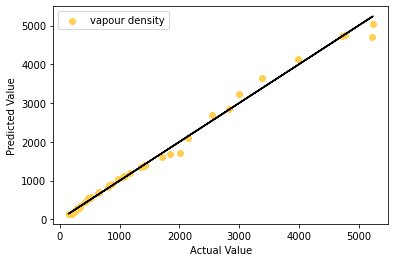

R squared value on vap total dataset:0.993
R squared value on vap training set:0.988
R squared value on vap test set:0.996


In [ ]:
# ============= Start of your code =============

# neural network: vapour density
pipe_rou_v = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                     hidden_layer_sizes=(29,),
                     early_stopping=True,
                     learning_rate='constant',
                     learning_rate_init=10,
                     batch_size=30,
                     alpha=0.05,
                     )

)
# neural network: training (vap)
pipe_rou_v.fit(X, rou_v)

# neural network: cross validation (vap)
scores_v = cross_validate(pipe_rou_v, X_all, rou_v_all, cv=cv_N, return_train_score=True)
train_score_mean_v = np.mean(scores_v['train_score'])  # average train_score
test_score_mean_v = np.mean(scores_v['test_score'])    # average test_score
print(f'training score for vapour density:{train_score_mean_v:.3f}')
print(f'test score for vapour density:{test_score_mean_v:.3f}')

# predict: training set & test set (vap)
rou_v_predicted = pipe_rou_v.predict(X_all)        # all data
rou_v_predicted_train = pipe_rou_v.predict(X)      # training set
rou_v_predicted_test = pipe_rou_v.predict(X_test)  # test set

# plot: actual values = predicted values (for contrast) (vap)
plt.plot(rou_v_all.squeeze(), rou_v_all.squeeze().squeeze(), c='k')
# plot: actual values vs. predicted values
plt.scatter(rou_v_all.squeeze(), rou_v_predicted, label='vapour density', c='#ffcf4f')
plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()

# r2 score: vapour density prediction
r2_v = r2_score(rou_v_all, rou_v_predicted)             # all data
r2_v_train = r2_score(rou_v, rou_v_predicted_train)     # training set
r2_v_test = r2_score(rou_v_test, rou_v_predicted_test)  # test set
print(f'R squared value on vap total dataset:{r2_v:.3f}')
print(f'R squared value on vap training set:{r2_v_train:.3f}')
print(f'R squared value on vap test set:{r2_v_test:.3f}')

# ============= End of your code =============

</font> <font color='red'> Your answer here </font>
* Both models give decent performance with high R squared values.

You discover that you know the real critical point - critical temperature, pressure and density

In [ ]:
df_critical = pd.read_excel(directory_1, sheet_name='Critical Point')
T_c = df_critical['Temperature / K'][0]
P_c = df_critical['Pressure / Pa'][0]
rho_c = df_critical['Density / (mol m^-3)'][0]

 <font color='blue'>  Do both models make physical sense? </font>  <font color='red'> (2 pts) </font>

In [ ]:
# ============= Start of your code =============
# critical point prediction

# input data (critical temperature & pressure)
X_c_0 = [T_c, P_c]
X_c = np.array(X_c_0).reshape(1, 2)

# prediction of critical density
liquid_critical_density = pipe_rou_l.predict(X_c)  # by liquid density prediction model
vapour_critical_density = pipe_rou_v.predict(X_c)  # by vapour density prediction model
print(f'actual critical density:{rho_c}')
print(f'critical density by liquid density model:{liquid_critical_density}')
print(f'critical density by vapour density model:{vapour_critical_density}')
# ============= End of your code =============

actual critical density:9596.032
critical density by liquid density model:[16666.10832276]
critical density by vapour density model:[5898.48313437]


</font> <font color='red'> Your answer here </font>

* Neither model can accurately predict the critical density.
* This is because when a substance is in a critical state, the interface between gas and liquid disappears, which means the concept of liquid phase or gas phase does not exist. Either liquid model or vapor model cannot give an accurate prediction, there will be a big deviation.

# ML models that make sense <font color='red'> (35 pts) </font>

<font color='blue'> Improve the model based on this physical insight. </font>. Similar tasks are very much at the forefront of Machine Learning research and open questions. Expecting a perfect fit on the critical point AND the rest of the dataset is unrealistic. <font color='blue'> Show your implementation and discuss how you came up for it. Include training and test scores for the liquid and vapour predictions, as well as the discrepancy of the dependent variableswith their expected critical point. </font>

Some ideas:

What mathematical relationships do you know about the critical point?

Manual exploration using hyperparameters, data augmentation, hyperparameter tuning, ...

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

training score:0.889
test score:0.886
actual critical density:9596.032
critical density by large dataset model:[9546.58956195]


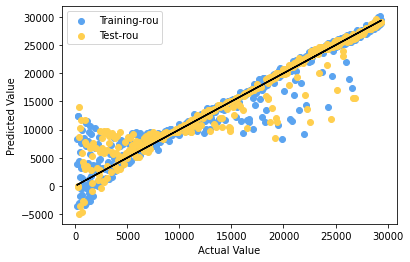

In [ ]:
# ============= Start of your code =============
'''Method 1'''

# obtain dataset
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
# training set
df = pd.read_excel(directory_2, sheet_name='PVT')
# test set
df_test = pd.read_excel(directory_1, sheet_name='PVT')

df_array = df.values
df_test_array = df_test.values

# data: Density, pressure and corresponding temperature from specific temperature range
# training set
def cond1(t1,t2):
    T_range = df[(df['Temperature / K'] > t1) & (df['Temperature / K'] < t2)]
    return T_range
# test set
def cond2(t1,t2):
    T_range_test = df_test[(df_test['Temperature / K'] > t1) & (df_test['Temperature / K'] < t2)]
    return T_range_test

# data: when T in range(200-400K)
data_range = cond1(200, 400)       # training set
data_range_test = cond2(200, 400)  # test set

data_range = data_range.values
data_range_test = data_range_test.values

# data X: Temperature (column 0) and Pressure (column 2)
X = data_range[:, [0, 2]]                          # training set
X = np.array(X).reshape(len(X), 2)                 # training set reshape
X_test = data_range_test[:, [0, 2]]                # test set
X_test = np.array(X_test).reshape(len(X_test), 2)  # test set reshape

# data y: Density (column 1)
rou = data_range[:, 1]                                   # training set
rou = np.array(rou).reshape(len(rou), 1)                 # training set reshape
rou_test = data_range_test[:, 1]                         # test set
rou_test = np.array(rou_test).reshape(len(rou_test), 1)  # test set reshape

# combine: training set & test set
X_all = np.vstack((X, X_test))        # X: Temperature & Pressure
rou_all = np.vstack((rou, rou_test))  # y: Density

# cross validation: 5-fold
cv_N = 5

# neural network
pipe_cri = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                 hidden_layer_sizes=(50,),
                 early_stopping=True,
                 max_iter=500,
                 learning_rate='constant',
                 learning_rate_init=6,
                 batch_size=32,
                 alpha=0.05,
                 )
)
# neural network: training
pipe_cri.fit(X, rou)

# neural network: cross validation
scores_cri = cross_validate(pipe_cri, X_all, rou_all, cv=cv_N, return_train_score=True)
train_score_mean_cri = np.mean(scores_cri['train_score'])  # average train_score
test_score_mean_cri = np.mean(scores_cri['test_score'])    # average test_score
print(f'training score:{train_score_mean_cri:.3f}')
print(f'test score:{test_score_mean_cri:.3f}')

# critical point prediction
# obtain critical point data
df_critical = pd.read_excel(directory_1, sheet_name='Critical Point')
T_c = df_critical['Temperature / K'][0]
P_c = df_critical['Pressure / Pa'][0]
rho_c = df_critical['Density / (mol m^-3)'][0]

# input data (critical temperature & pressure)
X_c_0 = [T_c, P_c]
X_c = np.array(X_c_0).reshape(1, 2)
# prediction of critical density
critical_density_predicted = pipe_cri.predict(X_c)
print(f'actual critical density:{rho_c}')
print(f'critical density by large dataset model:{critical_density_predicted}')

# predict: training set & test set
pipe_cri_predict_train = pipe_cri.predict(X)      # training set
pipe_cri_predict_test = pipe_cri.predict(X_test)  # test set

# plot: actual values = predicted values (for contrast)
plt.plot(rou.squeeze(), rou.squeeze(), c='k')
# plot: actual values vs. values predicted by training set input
plt.scatter(rou.squeeze(), pipe_cri_predict_train.squeeze(), label='Training-rou', c='#5ba4f0')
# plot: actual values vs. values predicted by test input
plt.scatter(rou_test.squeeze(), pipe_cri_predict_test.squeeze(), label='Test-rou', c='#ffcf4f')

plt.xlabel('Actual Value', fontsize=10)
plt.ylabel('Predicted Value', fontsize=10)
plt.legend()
plt.show()
# ============= End of your code =============

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/d

training score for liquid density:0.996
test score for liquid density:0.990


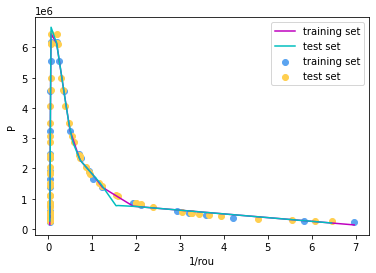

r2 score for train set:0.992
r2 score for test set:0.995
critical density actual value:9596.032
critical density predicted value:9870.837
error:0.0286


In [ ]:
# ============= Start of your code =============
'''Method 2'''

'''
* mathematical relationship of critical point on P-V graph:
  dP/dV based on critical temperature = 0
* rou = M * 1/V, which means 1/rou is proportional to V
  so P-V graph is equivalent to P-(1/rou) graph in exception of scale
  when derivative of the function = 0, corresponding density is critical density
* Pressure increase, liquid density decrease, vapour density increase
  want (1/rou) from small to big:
  start with biggest liquid density, to lowest liquid density = pressure from low to high
  then biggest vapour density, lowest vapour density = pressure from high to low
  input = ascending pressure(for 1/rou(liq)) + descending pressure(for 1/rou(vap)) (use flip)
'''


# obtain dataset
directory_2 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Data.xlsx"
directory_1 = "https://raw.githubusercontent.com/OptiMaL-PSE-Lab/ML-course/master/VLE%20prediction/Test-Dataset%20(no%20noise).xlsx"
# training set
df_test = pd.read_excel(directory_1, sheet_name='Phase Envelope')
# test set
df = pd.read_excel(directory_2, sheet_name='Phase Envelope')

df_array = df.values
df_test_array = df_test.values

'''
* mathematical relationship of critical point on P-V graph:
  dP/dV based on critical temperature = 0
* rou = M * 1/V, which means 1/rou is proportional to V
  so P-V graph is equivalent to P-(1/rou) graph in exception of scale
  when derivative of the function = 0, corresponding density is critical density
* Pressure increase, liquid density decrease, vapour density increase
  want (1/rou) from small to big:
  start with biggest liquid density, to lowest liquid density = pressure from low to high
  then biggest vapour density, lowest vapour density = pressure from high to low
  input = ascending pressure(for 1/rou(liq)) + descending pressure(for 1/rou(vap)) (use flip)
'''


# training set

# data X: Pressure (column 1)
P = df.iloc[:, 1].values                             # data
P = np.array(P).reshape(len(P), 1)                   # reshape
# combine P(ascending) + P(descending)
P_stack = P = np.vstack((P, np.flip(P)))             # training set input array

# data y1: 1/(Liquid Density) (column 2)
rou_l = df.iloc[:, 2].values                         # data
rou_l = np.array(rou_l).reshape(len(rou_l), 1)       # reshape
rou_l_re = np.true_divide(1, rou_l)                  # calculate 1/rou(liq)

# data y2: 1/(Vapour Density) (column 3)
rou_v = df.iloc[:, 3].values                         # data
rou_v = np.array(rou_v).reshape(len(rou_v), 1)       # reshape
rou_v_re = np.flip(np.true_divide(1, rou_v))         # calculate 1/rou(vap)

# combine: 1/rou(liq) & 1/rou(vap)
# amplify by 1000 times to make numbers clear
rou_re_all_train = np.multiply(np.vstack((rou_l_re, rou_v_re)), 1000)


# test set

# data X: Pressure (column 1)
P_test = df_test.iloc[:, 1].values                             # data
P_test = np.array(P_test).reshape(len(P_test), 1)              # reshape
# combine P(ascending) + P(descending)
P_test_stack = np.vstack((P_test, np.flip(P_test)))            # test set input array

# data y1: 1/(Liquid Density) (column 2)
rou_l_test = df_test.iloc[:, 2].values                         # data
rou_l_test = np.array(rou_l_test).reshape(len(rou_l_test), 1)  # reshape
rou_l_re_test = np.true_divide(1, rou_l_test)                  # calculate 1/rou(liq)

# data y2: 1/(Vapour Density) (column 3)
rou_v_test = df_test.iloc[:, 3].values                         # data
rou_v_test = np.array(rou_v_test).reshape(len(rou_v_test), 1)  # reshape
rou_v_re_test = np.flip(np.true_divide(1, rou_v_test))         # calculate 1/rou(vap)

# combine: 1/rou(liq) & 1/rou(vap)
# amplify by 1000 times to make numbers clear
rou_re_all_test = np.multiply(np.vstack((rou_l_re_test, rou_v_re_test)), 1000)

# combine: training set & test set
P_all = np.vstack((P_stack, P_test_stack))                   # X: Pressure
rou_re_all = np.vstack((rou_re_all_train, rou_re_all_test))  # y: 1/rou(liq) & 1/rou(vap)


# cross validation: 5-fold
cv_N = 5

# neural network: P-(1/rou)
pipe_new = make_pipeline(
    StandardScaler(),
    MLPRegressor(random_state=0,
                 solver='lbfgs',
                 hidden_layer_sizes=(41, 45),
                 early_stopping=True,
                 learning_rate='adaptive',
                 alpha=0.0009,
                 max_iter=1000,
                 )
)
# neural network: training
pipe_new.fit(rou_re_all_train, P_stack)

# neural network: cross validation
scores_new = cross_validate(pipe_new, rou_re_all, P_all, cv=cv_N, return_train_score=True)
train_score_mean_new = np.mean(scores_new['train_score'])  # average train_score
test_score_mean_new = np.mean(scores_new['test_score'])    # average test_score
print(f'training score for liquid density:{train_score_mean_new:.3f}')
print(f'test score for liquid density:{test_score_mean_new:.3f}')

# predict: training set & test set
P_pre_train = pipe_new.predict(rou_re_all_train)  # training set
P_pre_test = pipe_new.predict(rou_re_all_test)    # test set

# plot: visualisation of neural network
plt.plot(rou_re_all_train, P_pre_train, label='training set', c='m')
plt.plot(rou_re_all_test, P_pre_test, label='test set', c='c')
# plot: actual values
plt.scatter(rou_re_all_train.squeeze(), P, label='training set', c='#5ba4f0')
plt.scatter(rou_re_all_test.squeeze(), P_test_stack, label='test set', c='#ffcf4f')

plt.xlabel('1/rou', fontsize=10)
plt.ylabel('P', fontsize=10)
plt.legend()
plt.show()

# r2 score
r2_cri_train = r2_score(P_stack, P_pre_train)     # training set
r2_cri_test = r2_score(P_test_stack, P_pre_test)  # test set
print(f'r2 score for train set:{r2_cri_train:.3f}')
print(f'r2 score for test set:{r2_cri_test:.3f}')

# critical point values
df_critical = pd.read_excel(directory_1, sheet_name='Critical Point')
T_c = df_critical['Temperature / K'][0]
P_c = df_critical['Pressure / Pa'][0]
rho_c = df_critical['Density / (mol m^-3)'][0]

# critical density prediction

# 2 neighbour values(list) for derivatives calculation
x1 = [0]
x2 = [0]

# take the derivatives of density in range(9300,9900)
for i in np.linspace(9300, 9900, 10000):
    x1[0] = i
    x2[0] = i + 0.1  # delta x = 0.1
    # reshape data for prediction
    x1 = np.array(x1).reshape(1, -1)
    x2 = np.array(x2).reshape(1, -1)
    # predict value
    P1 = pipe_new.predict(1000*1/x1)
    P2 = pipe_new.predict(1000*1/x2)
    # calculate derivatives
    dif = (P1 - P2)/0.1
    # derivatives should be small
    if dif >= -5 and dif <= 5:
        x1[0] = np.round(x1[0], 3)  # round up
        x1 = x1[0]
        predicted_cri_den = x1[0]
        # error calculation
        error = (predicted_cri_den - rho_c)/rho_c
        print(f'critical density actual value:{rho_c}')
        print(f'critical density predicted value:{predicted_cri_den}')
        print(f'error:{np.round(error,4)}')
# ============= End of your code =============

</font> <font color='red'> Your answer here </font>

* At the critical point, only one phase exists. The heat of vaporization is zero. There is a stationary inflection point in the constant-temperature line on a P-V diagram. At the critical point exists a mathematical relationship:
(Note: $T_{c}$ refers to critical temperature)
$$ \displaystyle \Bigg[\frac{\partial P}{\partial V}\Bigg]_{T_{c}} = 0 $$
$$ \displaystyle \Bigg[\frac{\partial^{2} P}{\partial V^{2}}\Bigg]_{T_{c}} = 0 $$


* From the phase envelope data, we find that at temperatures below the critical temperature (304 K), there may be a coexistence of gas and liquid phases.
* As the temperature increases and the system pressure increases, the density of the liquid phase decreases due to volume expansion and the density of the gas phase increases due to compression. The difference between the densities of the liquid and gas phases gradually decreases.
* When the temperature gets to the critical temperature, the boundary between the gas and liquid phases disappears and the two phases have the same density.

* In Method 1, we tried to make a better prediction of the critical point by selecting the data near the critical point. Since data far from the critical point will have a large density difference between liquid and gas phases, which is inconsistent with the condition at the critical point, the accuracy of the model will decrease if these data are included. The critical temperature is 304.17 K, considering the amount of data, we selected data with temperature between 200K and 400K as a new dataset to construct the model.


* In Method 2, we fit the liquid phase density and the gas phase density at a certain pressure in the phase envelope through the neural network, and then combine the two curves of density variation with pressure to finally find the point of minimum density variation, which is the critical point, and the pressure corresponding to the critical point is the critical pressure.
